# Machine Learning Project

By Enric Millán and Juan Pablo Zaldivar

# 0. Importing Libraries

In [102]:
# !pip install pandas==1.5.3
# !pip install numpy==1.24.2
# !pip install seaborn==0.12.2
# !pip install sklearn==1.0.2
# !pip install matplotlib==3.5.1
# !pip install plotly==5.6.0

In [103]:
# ######################## BASIC IMPORTS ######################## #
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import arange
from pandas import read_csv

# ######################### PLOT IMPORTS ######################## #
import plotly.express as px
import matplotlib.pyplot as plt
from plotly import graph_objs as go
from plotly.subplots import make_subplots

# ######################### SKLEARN IMPORTS ######################## #
import sklearn.ensemble
import sklearn.naive_bayes
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import sklearn.discriminant_analysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# ######################### PREPROCESSING IMPORTS ######################## #
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# ######################### METRICS IMPORTS ######################## #
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score

# ######################### RESAMPLING IMPORTS ######################## #
from Resampling.resampling import compute_metrics
from Resampling.resampling import model_performance
from sklearn.model_selection import train_test_split

# ######################### WARNING IMPORTS ######################## #
import warnings
warnings.filterwarnings('ignore')

# ######################### PLOT SETTINGS ######################## #
pd.set_option("display.max_columns", None)
colors = ['#440154', "#471365", "#482475", "#463480", "#414487", "#3b528b", "#355f8d", "#2f6c8e", "#2a788e",
          "#25848e", "#21918c", "#1e9c89", "#22a884", "#2fb47c", "#44bf70", "#5ec962", "#7ad151", "#9bd93c",
          "#bddf26", "#d8e219", "#fde725"]

# 1. Introduction

En el presente proyecto se trabajará con un dataset real, para el cual se le aplicarán conceptos propios de la metodología de modelos, dentro del área de _Machine Learning_. Desde la lectura y preprocesado de los datos, hasta la generación de un modelo final y la evaluación de su calidad de predicción.

## 1.1 Dataset Statement

El dataset propuesto para este proyecto es de **League of Legends**, el cual contiene una colección de datos relacionados con partidas jugadas en el popular videojuego multijugador en línea en el servidor de norte América durante la temporada de 2020 y para el rango de *Diamante*.

Tal y como se explica en la página oficial de Wikipedia, **League of Legends** (LoL) es un videojuego multijugador en línea de estrategia en tiempo real y de género MOBA (*Multiplayer Online Battle Arena*).En el juego, dos equipos de cinco jugadores luchan en un combate jugador contra jugador, cada equipo ocupando y defendiendo su mitad del mapa. Cada uno de los diez jugadores controla un personaje, conocido como "campeón", con habilidades únicas y diferentes estilos de juego. Durante una partida, los campeones se vuelven más poderosos acumulando puntos de experiencia y ganando oro que se emplea para la compra de artículos para derrotar al equipo contrario. En el modo principal de juego de LoL, League, "La Grieta del Invocador", un equipo gana al abrirse paso hasta la base enemiga y destruir su "nexo", una gran estructura ubicada dentro de la cual se emanan tres líneas de súbditos o "minions", personajes no jugadores que al ser eliminados por el equipo enemigo otorgan oro y experiencia.

## 1.2 Objective

En este proyecto se pretende analizar los datos de las partidas de **League of Legends** para intentar predecir su desenlace mediante el desarrollo de modelos propios de *Machine Learning*. Además de analizar que factores tienen más importancia en los 10 primeros minutos a la hora de que uno de los dos equipos gane la partida.

## 1.3 Motivation

**League of Legends** es uno de los videojuegos más populares y competitivos del mundo, con millones de jugadores en todo el mundo. Dada su creciente popularidad, es un juego que consta de un nivel internacional muy alto, de hasta un total de casi 44 millones de espectadores simultáneos en 2019. (CITA)

En consecuencia, el análsis de los datos estadísticos puede suponer una ventaja competitiva para los jugadores profesionales, ya que les permite mejorar su rendimiento y su estrategia de juego. Con lo que un tratamiento y modelización de los datos adecuados en vista del mundo de los _eSports_ puede ser muy útil. Por lo que hemos creído interesante estudiar datos de los **10 primeros minutos** de casi 10,000 partidas del rango Diamante (uno de los rangos más altos por nivel de jugador) supondría un buen punto de partida y un reto interesante para el proyecto.

# 2. Data

Los datos en formato csv han sido extraídos de la páguina web de [*Kaggle*](https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min?resource=download), habiendo sido distribuídos originalmente por *Riot Games* (empresa fundadora de League of Legends).

In [104]:
dataset = read_csv("league_dataset.csv", header=0, delimiter=',')
dataset.head()

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  \
0          9           6           11                  0            0   
1          5           5            5                  0            0   
2          7          11            4                  1            1   
3          4           5            5                  1            0   
4          6           6            6                  0            0   

   blueHeralds  blueTowersDestroyed  blueTotalGold  blueAvgLevel  \
0            0                    0          17210           6.6   
1            0                    0          14712           6.6   
2            0                    0          16113           6.4   
3            1                    0          15157           7.0   
4            0                    0          16400           7.0   

   blueTotalExperience  blueTotalMinionsKilled  blueTotalJungleMinionsKilled  \
0                17039                     195                            36   
1                16265                     174                            43   
2                16221                     186                            46   
3                17954                     201                            55   
4                18543                     210                            57   

   blueGoldDiff  blueExperienceDiff  blueCSPerMin  blueGoldPerMin  \
0           643                  -8          19.5          1721.0   
1         -2908               -1173          17.4          1471.2   
2         -1172               -1033          18.6          1611.3   
3         -1321                  -7          20.1          1515.7   
4         -1004                 230          21.0          1640.0   

   redWardsPlaced  redWardsDestroyed  redFirstBlood  redKills  redDeaths  \
0              15                  6              0         6          9   
1              12                  1              1         5          5   
2              15                  3              1        11          7   
3              15                  2              1         5          4   
4              17                  2              1         6          6   

   redAssists  redEliteMonsters  redDragons  redHeralds  redTowersDestroyed  \
0           8                 0           0           0                   0   
1           2                 2           1           1                   1   
2          14                 0           0           0                   0   
3          10                 0           0           0                   0   
4           7                 1           1           0                   0   

   redTotalGold  redAvgLevel  redTotalExperience  redTotalMinionsKilled  \
0         16567          6.8               17047                    197   
1         17620          6.8               17438                    240   
2         17285          6.8               17254                    203   
3         16478          7.0               17961                    235   
4         17404          7.0               18313                    225   

   redTotalJungleMinionsKilled  redGoldDiff  redExperienceDiff  redCSPerMin  \
0                           55         -643                  8         19.7   
1                           52         2908               1173         24.0   
2                           28         1172               1033         20.3   
3                           47         1321                  7         23.5   
4   

El dataset contiene información sobre aproximadamente 10,000 partidas, con variables relacionada a las partidas y ambos equipos. Las variables correspondientes al equipo rojo tienen el prefijo `blue` y las del equipo azul el prefijo `red`.

## 2.1 Data Description

In [105]:
dataset.describe()

gameId     blueWins  blueWardsPlaced  blueWardsDestroyed  \
count  9.879000e+03  9879.000000      9879.000000         9879.000000   
mean   4.500084e+09     0.499038        22.288288            2.824881   
std    2.757328e+07     0.500024        18.019177            2.174998   
min    4.295358e+09     0.000000         5.000000            0.000000   
25%    4.483301e+09     0.000000        14.000000            1.000000   
50%    4.510920e+09     0.000000        16.000000            3.000000   
75%    4.521733e+09     1.000000        20.000000            4.000000   
max    4.527991e+09     1.000000       250.000000           27.000000   

       blueFirstBlood    blueKills   blueDeaths  blueAssists  \
count     9879.000000  9879.000000  9879.000000  9879.000000   
mean         0.504808     6.183925     6.137666     6.645106   
std          0.500002     3.011028     2.933818     4.064520   
min          0.000000     0.000000     0.000000     0.000000   
25%          0.000000     4.000000     4.000000     4.000000   
50%          1.000000     6.000000     6.000000     6.000000   
75%          1.000000     8.000000     8.000000     9.000000   
max          1.000000    22.000000    22.000000    29.000000   

       blueEliteMonsters  blueDragons  blueHeralds  blueTowersDestroyed  \
count        9879.000000  9879.000000  9879.000000          9879.000000   
mean            0.549954     0.361980     0.187974             0.051422   
std             0.625527     0.480597     0.390712             0.244369   
min             0.000000     0.000000     0.000000             0.000000   
25%             0.000000     0.000000     0.000000             0.000000   
50%             0.000000     0.000000     0.000000             0.000000   
75%             1.000000     1.000000     0.000000             0.000000   
max             2.000000     1.000000     1.000000             4.000000   

       blueTotalGold  blueAvgLevel  blueTotalExperience  \
count    9879.000000   9879.000000          9879.000000   
mean    16503.455512      6.916004         17928.110133   
std      1535.446636      0.305146          1200.523764   
min     10730.000000      4.600000         10098.000000   
25%     15415.500000      6.800000         17168.000000   
50%     16398.000000      7.000000         17951.000000   
75%     17459.000000      7.200000         18724.000000   
max     23701.000000      8.000000         22224.000000   

       blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  \
count             9879.000000                   9879.000000   9879.000000   
mean               216.699565                     50.509667     14.414111   
std                 21.858437                      9.898282   2453.349179   
min                 90.000000                      0.000000 -10830.000000   
25%                202.000000                     44.000000  -1585.500000   
50%                218.000000                     50.000000     14.000000   
75%                232.000000                     56.000000   1596.000000   
max                283.000000                     92.000000  11467.000000   

       blueExperienceDiff  blueCSPerMin  blueGoldPerMin  redWardsPlaced  \
count         9879.000000   9879.000000     9879.000000     9879.000000   
mean           -33.620306     21.669956     1650.345551       22.367952   
std           1920.370438      2.185844      153.544664       18.457427   
min          -9333.000000      9.000000     1073.000000        6.000000   
25%          -1290.500000     20.200000     1541.550000       14.000000   
50%            -28.000000     21.800000     1639.800000       16.000000   
75%           1212.000000     23.200000     1745.900000       20.000000   
max           8348.000000     28.300000     2370.100000      276.000000   

       redWardsDestroyed  redFirstBlood     redKills    redDeaths  \
count        9879.000000    9879.000000  9879.000000  9879.000000   
mean            2.723150       0.495192     6.137666     6.183

A simple vista y aplicando conocimientos previos del juego hay algunos valores que parecen no encajar. Por ejemplo, para la variable *blueWardsPlaced* el valor máximo es de 250 (y para *redWardsPlaced* sucede algo similar con 276), valor que desentona ya que es un valor muy elevado incluso para partidas completas.

La única manera de llegar a esta cantidad en los 10 primeros minutos de partida implica que alguno o varios de los jugadores, potencialmente con rol de *Support*  (este rol suele adquirir un objeto que permite colocar más *Wards* de lo normal), esten jugando muy probablemente de forma errática con el propósito de alcanzar tal cantidad y no con el propósito de ganar la partida.

Otros dos valores que llaman la atención son los valores máximos de las diferencias de experiencia y oro (*blueGoldDiff*, *blueExperienceDiff* y sus contrapartes para el equipo rojo). Era de esperar que saliesen valores como estos ya que en partidas donde la diferencia de nivel es muy grande (cosa que debería pasar en pocos casos ya que las partidas se establecen con jugadores de rango similar) o como en el caso anterior, uno o varios jugadores de un equipo están jugando con objetivos diferentes de la victoria y estan dejando al equipo rival tomar ventaja. Estos casos se relacionan directamente con valores atípicamente bajos de oro y experiencia (*blueTotalGold* y *blueTotalExperience*) para ambos equipos como veremos más adelante.

Se volverán a analizar estos casos (si es necesario) en apartados posteriores ya que, como se ha argumentado, es muy probable que se trate de outilers. 

In [106]:
dataset.shape

(9879, 40)

Tras la lectura de los datos observamos que tenemos 9879 partidas, cada una de ellas con 40 columnas, las cuales representan las características de cada partida. La columna **blueWins** es la que nos indica si el equipo azul ha ganado la partida o no, por lo tanto será nuestra variable objetivo. 

La variable objetivo es una variable binaria, por lo que podemos calcular la proporción de partidas ganadas por el equipo azul y el equipo rojo para comprobar que nuestro dataset está equilibrado, es decir, que el porcentaje de victorias azules debería ser aproximadamente del 50%.

In [107]:
W, L = dataset['blueWins'].value_counts()

In [108]:
fig = px.bar(x=['Blue Wins', 'Red Wins'],
             y=[W, L],
             color=['Blue Wins', 'Red Wins'],
             color_discrete_sequence=['#440154', '#21918c'],
             text=[W, L])

fig.update_layout(title='Balance between the two classes',
                  xaxis_title='Wins',
                  yaxis_title='Count',
                  showlegend=False)
fig.show()

In [109]:
print('Blue Wins: {} ({}%), Red Wins: {} ({}%)'.format(W,round(100*W/(W+L),2),L,round(100*L/(W+L),2)))

Blue Wins: 4949 (50.1%), Red Wins: 4930 (49.9%)


Como se observa, los datos sobre la variable objetivo están casi perfectamente balanceados, por lo que no habrá que preocuparse por ello. Pues cuando el dataset esta desbalanceado, es decir, cuando una de las clases tiene una proporción muy superior a la otra, los modelos de clasificación pueden estar sesgados hacia la clase mayoritaria, lo que puede llevar a un sesgo en los resultados y un desempeño pobre para la clase minoritaria.

## 2.2 Variable Description

Con respecto a las variables predictoras, podemos observar que tenemos 33 variables numéricas y 6 variables categóricas (existen otras variables que toman valores en un conjunto discreto y finito, pero de momento no consideramos que resulte útil tratarlas como categóricas).

In [110]:
dataset.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

Las variables categoricas son **blueFirstBlood**, **blueDragons** y **blueHeralds** (y sus contrapartes del equipo rojo). La primera variable indica si el equipo azul ha conseguido la primera sangre o no, mientras que la segunda y tercera indican si el equipo azul ha conseguido matar al dragon y al heraldo respectivamente (mirar sección 2.2.1 para definición de conceptos). En cuanto a los valores que toman estas variables, podemos observar que las tres variables toman valores binarios.

In [111]:
dataset['blueFirstBlood'].value_counts()

1    4987
0    4892
Name: blueFirstBlood, dtype: int64

In [112]:
dataset['blueDragons'].value_counts()

0    6303
1    3576
Name: blueDragons, dtype: int64

In [113]:
dataset['blueHeralds'].value_counts()

0    8022
1    1857
Name: blueHeralds, dtype: int64

También se podrían considerar como categóricas las variables *blueTowersDestroyed* y *redTowersDestroyed*, pero como comparten una relación de orden, se considera que por el momento es mejor tratarlas como variables numéricas.

Nuestra decisión se basa en que las variables como *blueHeralds*, *blueDragons* representan el hecho de "haber matado al heraldo o no", "haber matado al dragon o no", etc. En cambio, con *blueTowersDestroyed* y su contraparte roja, se busca cuantificar el número de torres destruídas por cada equipo.

Para los lectores no familiarizados al videojuego daremos una breve explicación de las variables del equipo azul. Las variables del equipo rojo son análogas a las del equipo azul, por lo que no se explicarán. 

- *blueWins* : esta variable indica si el equipo azul se ha alzado vencedor de la partida, es la variable que se quiere predecir (1 para victoria azul, 0 para victoria roja).

- *blueWardsPlaced* : indica el número de *wards* colocados por el equipo azul. Un *ward* aporta visión del mapa al equipo que lo coloca, por lo que puede suponer una ventaja táctica si se coloca apropiadamente.

- *blueWardsDestroyed* : indica el número de *wards* rojos destruidos por el equipo azul.

- *blueFirstBlood* : indica el equipo que ha hecho la primera sangre (primera *kill* o eliminación), 1 si ha sido el equipo azul, 0 si ha sido el equipo rojo.

- *blueKills* : indica el número total de *kills* o eliminaciones del equipo azul. Una *kill* se da cuando se elimina a uno de los jugadores rivales (tras ser eliminado se reaparece tras un cierto período de tiempo, por lo que no hay un límite de asesinatos).

- *blueAssists* : indica el número total de asistencias del equipo azul. Una asistencia se consigue cuando un jugador hace daño a un rival y en un corto periodo de tiempo ese rival es eliminado por otro jugador distinto (este consigue una *kill*).

- *blueDragons* : indica la cantidad de *Dragones* eliminados por el quipo azul. Por reglas del juego, en los 10 primeros minutos solo es posible eliminar 1 como mucho.

- *blueHeralds* : indica la cantidad de *Heraldos* eliminados por el equipo azul. Tal y como sucede con los dragones, en los 10 primeros minutos solo es posible eliminar 1 como mucho.

- *blueTowersDestroyed* : indica el número de *torres* del equipo rojo (principales estructuras defensivas) destruídas por el equipo azul.

- *blueTotalGold* : indica el número total de oro conseguido por los integrantes del equipo azul. El oro permite comprar objetos que aportan ventajas y mejoran las estadísticas del jugador.

- *blueAvgLevel* : indica la media de nivel de los jugadores del equipo azul tras los 10 primeros minutos. Cada jugador sube de nivel con la *experiencia*, que se consigue eliminando *súbditos*, *monstruos* y jugadores enemigos entre otros.

- *blueTotalExperience* : indica la cantidad de experiencia total conseguida por el equipo azul. La experiencia permite subir de nivel al jugador y mejorar así sus habilidades y ataques.

- *blueTotalMinionsKilled* : indica la cantidad total de *minions* o *súbditos* eliminados por el equipo azul durante los 10 primeros minutos. Eliminar súbditos aporta tanto experiencia como oro.

- *blueTotalJungleMinionsKilled* : indica la cantidad de monstruos de la jungla eliminados por el equipo azul. Los monstruos de la jungla tienen una función similar a la de los súbditos, pero estos aportan más oro y experiencia al jugador del equipo con el rol de *jungla*.

Existen las variables que relacionan algunas de las ya explicadas (como, por ejemplo, *blueGoldDiff*), que en apartados posteriores serán explicadas para justificar su posible eliminación del dataset, También están estas mismas variables para el equipo rojo.

#### 2.2.1 Glossary


- *Ward* : ítem que puede colocarse en el mapa para revelar una zona y aportar visión a tu equipo. Resulta muy útil a nivel táctico para controlar objetivos como Dragones o Heraldos.

- *Minion* o *Súbdito* : NPC (Non Playable Character) que pertenece a un equipo (aparecen la misma cantidad de súbditos para el equipo rojo y para el equipo azul). Cuando mueren aportan experiencia a los jugadores del equipo contrario cercanos, y oro exclusivamente al jugador enemigo que haya eliminado al súbidto.

- *Jungle Minion* o *Monstruo de la Jungla* : NPC que no pertenece a ningun equipo. Aporta oro y experiencia de la misma manera que los súbditos normales al ser eliminado, pero este oro y experiencia aumenta si el jugador que los elimina es que tiene el rol de *Jungla*. Según de que monstruo se trate también puede aportar potenciadores temporales al jugador que lo haya eliminado.

- *Dragones* : calificados como *Monstruos Épicos* aparecen en una zona concreta cada cierto tiempo (como se ha mencionado, en los primeros 10 minutos solo es posible eliminar a uno) del mapa y tiene mucha más vitalidad que los demás monstruos de la Jungla. Al ser eliminado por un equipo, además de aportar oro y experiencia a todos los miembros del equipo también les aporta un potenciador permanente que dura toda la partida y cuyos efectos varían según el tipo de dragón.

- *Heraldos* : también calificados como *Monstruos Épicos*, aparece en otra zona concreta del mapa cada cierto tiempo (solo es posible elimianr 1 durante los primeros 10 minutos) y aporta oro y experiencia al equipo que lo elimine, pero su principal utilidad es que tras ser eliminado el jugador que recoja su *ojo* podrá invocar al Herlado que actuará como un súbdito de gran tamaño y vida y que  si impacta contra estructuras enemigas (torres) causará un gran daño a estas.

- *Torres* : para ganar la partida se debe destruir el *Nexo* enemigo, y las torres son las estructuras defensivas que deben ser destruidas para poder llegar al *Nexo*. Destruir torres además de una ventaja táctica también aporta una gran cantidad de oro.

- *Nivel* : el nivel determina junto a los objetos el "poder" de un jugador. Todos los jugadores empiezan en nivel 1 al inicio de la partida y el nivel máximo es 18. Se sube de nivel con la experiencia conseguida por derrotar súbditos, jugadores rivales, etc.



# 3. Data Preprocessing

En este apartado se explicará el proceso de preprocesado de los datos, que consiste en la limpieza y transformación de los datos para que puedan ser utilizados por los modelos de Machine Learning propuestos en siguientes apartados. 

Los pasos para el preprocesado de los datos incluyen la eliminación de variables que no aportan información, el tratamiento de valores faltantes y atípicos, la transformación de ciertas variables y la estandarización y normalización de los datos.

## 3.1 Data Cleaning

### 3.1.1 Drop Columns

En base a las descripciones de las variables y los conocimientos previos sobre el videojuego, en este apartado se tratará de buscar dependencias y/o inconsistencias entre las variables a modo de eliminar las que no resulten útiles o sean redundantes.

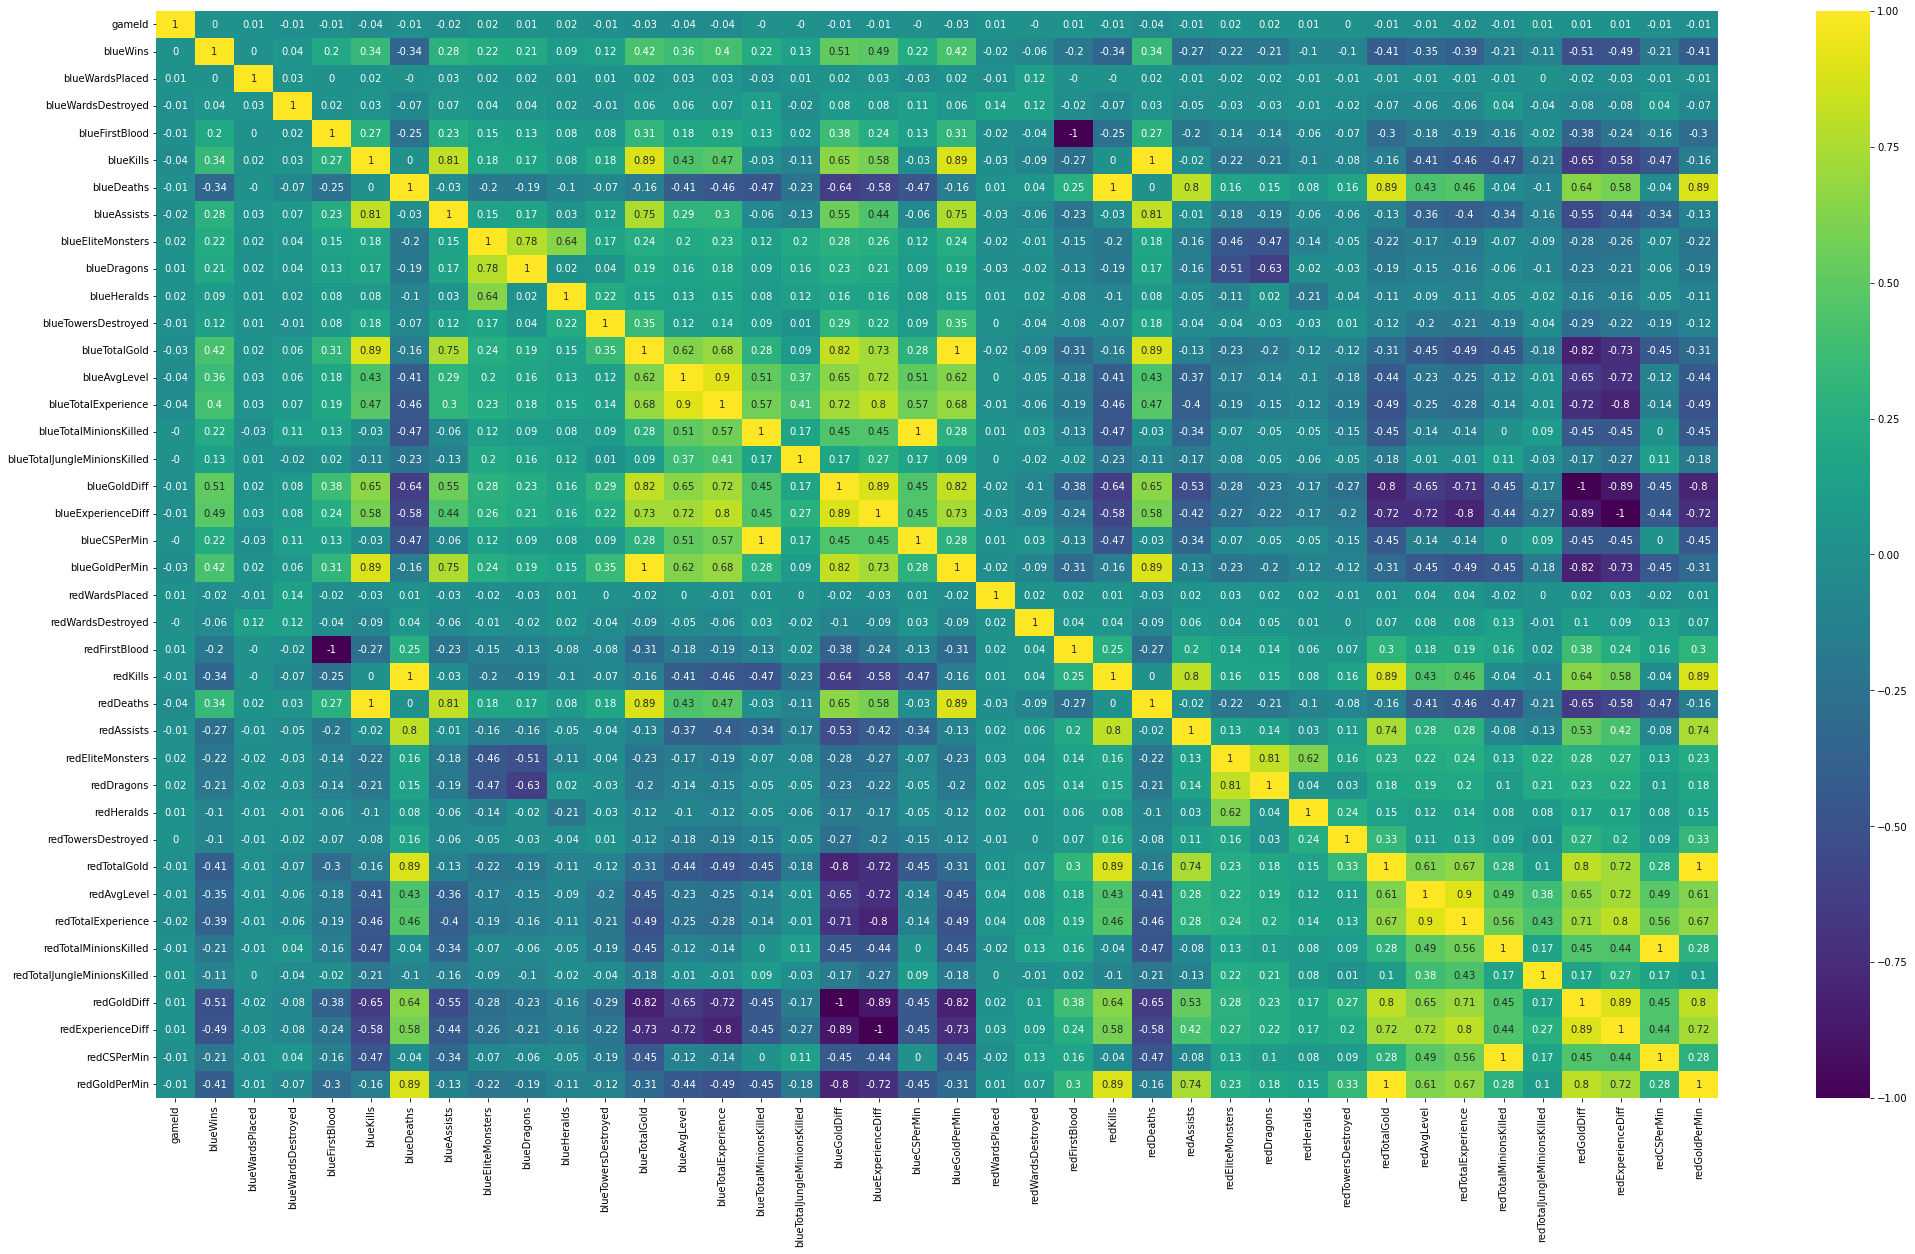

In [114]:
plt.figure(figsize=(35,20))
sns.heatmap(round(dataset.corr(),2), cmap='viridis', annot=True)
plt.show()

Tras la descripción de las variables y el plot del *heatmap* podemos observar que hay correlación entre distintas variables.

En términos generales, se observa que hay correlación entre las variables que contienen la diferencia y el total, tanto para el equipo azul como para el equipo rojo. Por ejemplo, *blueGoldDiff* y *blueGoldTotal* están altamente correlacionadas, lo mismo ocurre con *blueExperienceDiff* y *blueExperienceTotal*. Como es de esperar, estas variables también presentan correlación entre ambos equipos, por ejemplo *blueGoldDiff* y *redGoldDiff*, así como las demás.

Las variables correspondientes al número de kills, asistencias y muertes de cada equipo también están correlacionadas, por ejemplo *blueKills* y *redDeaths*. Así como por consecuencia, las variables que contienen la diferencia entre ambos equipos también están correlacionadas, por ejemplo *blueKillsDiff* y *redDeathsDiff*. Un mayor numero de muertes corresponde también a una mayor ganancia de oro y experiencia, por lo que también están correlacionadas estas variables.

A continuación se mencionan algunas de las variables que se han eliminado del dataset por ser redundantes o no aportar información en base a los mismos criterios que se han explicado anteriormente:

- *gameId* : la variable actua como identificador de cada partida, algo que no tiene influencia sobre la propia partida y por lo tanto es irrelevante para el modelo.

- *redCSPerMin* : esta variable es completamente dependiente de *redTotalMinionsKilled*, pues su valor es el de esta última variable dividido entre 10 (minutos de partida transcurridos en el momento en el que se toman los datos).

- *blueCSPerMin* : mismo caso que con *redCSPerMin*.

- *redGoldPerMin* y *blueGoldPerMin*: exactamente la misma situación que con las dos variables anteriores, sus valores son los de *redTotalGold* y *blueTotalGold* divididos entre 10 (minutos de partida transcurridos en el momento en el que se toman los datos).

- *redGoldDiff* : como estamos prediciendo si gana el equipo azul mantendremos *blueGoldDiff* (que tiene el mismo valor que *redGoldDiff* pero con signo contrario) ya que por el momento nos parece interesante enfatizar la importancia de la diferencia de este recurso en el juego.

- *redEliteMonsters* y *blueEliteMonsters* : estas variables son la suma de *redDragons* y *redHeralds*, y *blueDragons* y *blueHeralds* respectivamente, por lo que también son variables redundantes.

- *redExperienceDiff* : Como sucede con *redGoldDiff*, esta variable toma el mismo valor pero con signo contrario que su contraparte azul, y también como en el caso anterior, mantendremos *blueExperienceDiff* para representar y enfatizar la diferencia entre ambos equipos.

- *redDeaths* y *blueDeaths* : variables directamente ligadas a *blueKills* y *redKills*, por lo que son redundantes, como se menciona al inicio de este apartado.

- *blueTotalGold*, *blueTotalExperience*, *redTotalGold* y *redTotalExperience* : por el momento y aplicando conocimientos previos del juego, hemos decidido que en los 10 primeros minutos (y en general en toda la partida) es mucho más importante la diferencia de recursos y experiencia que la propia cantidad de recursos y experiencia, por lo que prescindiremos de estas variables manteniendo *blueGoldDiff* y *blueExperienceDiff*.

- *blueWardsDestroyed* y *redWardsDestroyed* : si bien colocar *wards* aporta visión sobre algunas zonas del mapa, eliminarlos o destruirlos lleva más tiempo (puesto que según el tipo, el *ward* debe ser golpeado hasta 4 veces y colocarlo, en cambio, es instantáneo) y tiene una influencia considerablemente menor que colocarlos.

- *redFirstBlood* : variable directamente ligada a *blueFirstBlood*, si esta última toma valor 1 el equipo azul ha hecho la primera sangre, si toma valor 0 el equipo rojo ha hecho la primera sangre. Podría darse el caso de que ninguno de los dos equipos haga la primera sangre, pero esto no es un escenario posible en el dataset, pues si ninguno de los dos equipos ha hecho la primera sangre, ambas variables toman valor 0 y como se comprueba a continuación, no hay ninguna partida en la que esto ocurra. En caso de que hubiese muestras como el caso último mencionado, crearíamos una nueva variable llamada *FirstBlood* que sería la diferencia entre *blueFirstBlood* y *redFirstBlood*: si toma valor 1, el equipo azul hizo la primera sangre, si toma valor -1 fue el equipo rojo, si toma valor 0, ninguno de los dos equipos ha hecho la primera sangre todavía.

In [115]:
len(dataset[(dataset['blueFirstBlood'] == 0) & (dataset['redFirstBlood'] == 0)])

0

Procedemos a limpiar el dataset:

In [116]:
drop_cols = ['gameId','blueCSPerMin','blueGoldPerMin','blueDeaths','blueEliteMonsters', 'blueWardsDestroyed',
             'redWardsDestroyed', 'redDeaths','redCSPerMin','redGoldDiff','redFirstBlood','redGoldPerMin','redEliteMonsters','redExperienceDiff', 'blueTotalGold', 'blueTotalExperience', 'redTotalGold', 'redTotalExperience']
dataset.drop(drop_cols, axis=1, inplace=True)
dataset.head(10)

blueWins  blueWardsPlaced  blueFirstBlood  blueKills  blueAssists  \
0         0               28               1          9           11   
1         0               12               0          5            5   
2         0               15               0          7            4   
3         0               43               0          4            5   
4         0               75               0          6            6   
5         1               18               0          5            6   
6         1               18               1          7            7   
7         0               16               0          5            3   
8         0               16               0          7            8   
9         1               13               1          4            5   

   blueDragons  blueHeralds  blueTowersDestroyed  blueAvgLevel  \
0            0            0                    0           6.6   
1            0            0                    0           6.6   
2            1            0                    0           6.4   
3            0            1                    0           7.0   
4            0            0                    0           7.0   
5            1            0                    0           7.0   
6            1            0                    0           6.8   
7            0            0                    0           6.4   
8            0            0                    0           7.2   
9            1            0                    0           6.8   

   blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  \
0                     195                            36           643   
1                     174                            43         -2908   
2                     186                            46         -1172   
3                     201                            55         -1321   
4                     210                            57         -1004   
5                     225                            42           698   
6                     225                            53          2411   
7                     209                            48         -2615   
8                     189                            61         -1979   
9                     220                            39         -1548   

   blueExperienceDiff  redWardsPlaced  redKills  redAssists  redDragons  \
0                  -8              15         6           8           0   
1               -1173              12         5           2           1   
2               -1033              15        11          14           0   
3                  -7              15         5          10           0   
4                 230              17         6           7           1   
5                 101              36         3           2           0   
6                1563              57         6           9           0   
7                -800              15        13          11           1   
8                -771              15         7           5           1   
9               -1574              16         5           4           0   

   redHeralds  redTowersDestroyed  redAvgLevel  redTotalMinionsKilled  \
0           0                   0          6.8                    197   
1           1                   1          6.8                    240   
2           0                   0          6.8                    203   
3           0                   0          7.0                    235   
4           0                   0          7.0                    225   
5           0                   0          7.0                    221   
6           0                   0          6.4                    164   
7           0                   0          6.6                    157   
8           1                   0          7.2                    240   
9           0                   0          6.8                    247   

   redTotalJungleMinionsKilled  
0               

Tras la limpieza del dataset, el mismo queda con 26 variables y 9879 observaciones.

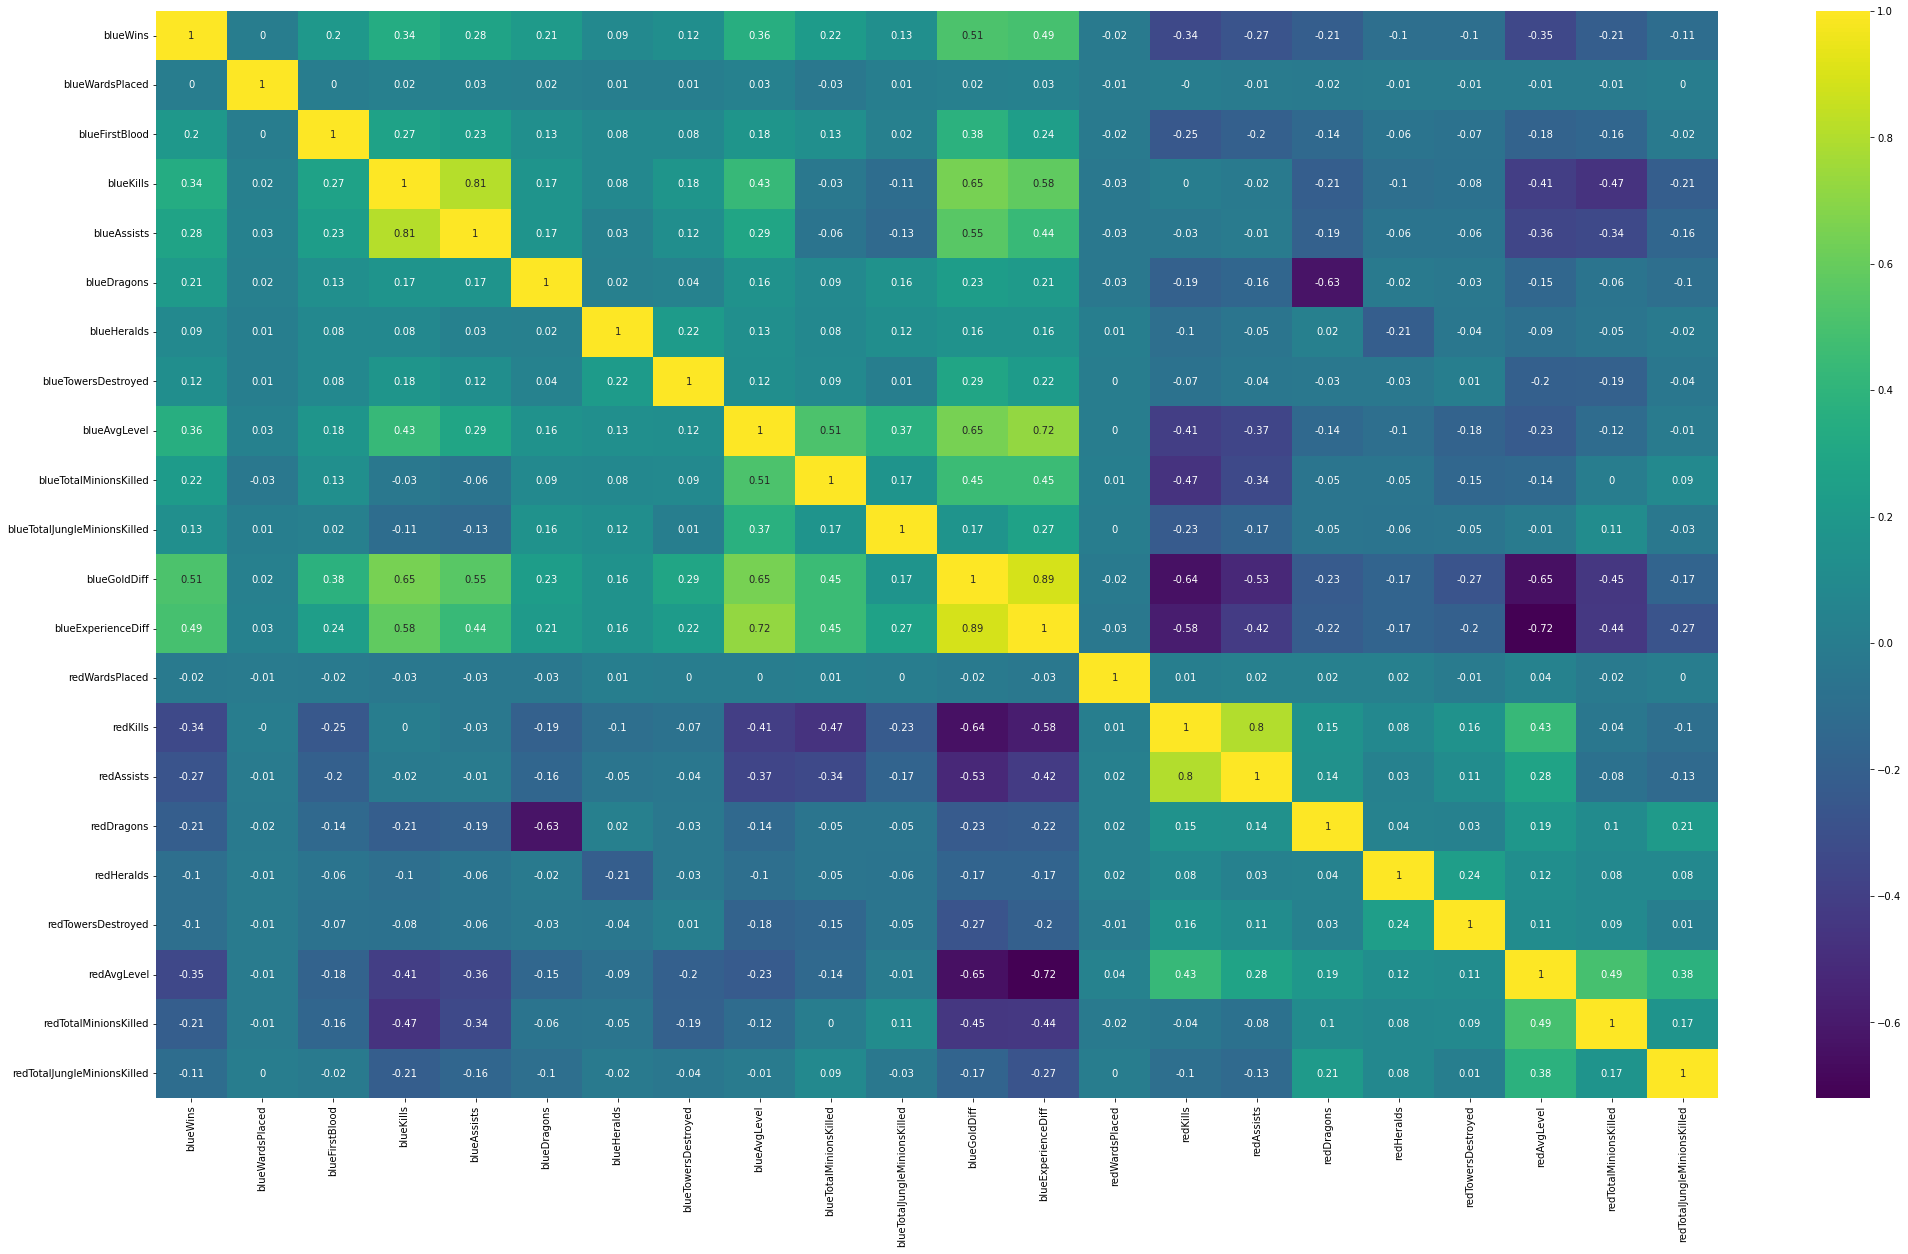

In [117]:
plt.figure(figsize=(35,20))
sns.heatmap(round(dataset.corr(),2), cmap='viridis', annot=True)
plt.show()

### 3.1.2 Missing Values

Tras haber hecho una primera limpieza del dataset y a pesar de que en *Kaggle* se indica que el dataset no tiene *Missing Values*, ya que son datos empíricos que se recolectan en todas la partidas por la propia empresa desarrolladora (*Riot Games*) (y de que no hay posibilidad de que "no existan" NO ENTENDO), haremos una breves comprobaciones para confirmar este hecho.

In [118]:
dataset.isnull().sum().sum()

0

Como podemos observar en la tabla anterior, no tenemos ningún valor nulo en nuestro dataset, por lo que no será necesario realizar ningún tratamiento de valores nulos.

In [119]:
dataset.isna().sum().sum()

0

Tampoco existen valores *Na* que puedan afectar a los futuros modelos.

In [120]:
print(dataset[dataset.eq("-")].count().sum(),
      dataset[dataset.eq("#")].count().sum(),
      dataset[dataset.eq("?")].count().sum(),
      dataset[dataset.eq(" ")].count().sum(),
      ) 

0 0 0 0


Probando con otras posibles configuraciones para *Missing Values* confirmamos nuestra suposición.

### 3.1.3 Train-test split

In [121]:
X = dataset.drop('blueWins', axis=1)
y = dataset['blueWins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=77)

### 3.1.4 Outlier treatment

Con el análisis inicial ya se ha consolidado una idea de donde podría haber outliers o observaciones atípicas. Para dar un contetxo más visual y poder detectar posibles outliers en otras variables haremos un *boxplot* de estas. 

No se tiene en cuenta variables como *blueTotalMinionsKilled* y *blueTotalJungleMinionsKilled* entre otras varias ya que son variables que si pueden fluctuar más sin tener necesariamente un sentido negativo (en cuánto a outliers se refiere) que no se pueda identificar ya con otras variables; por ejemplo, si hay jugadores del equipo azul inactivos en la partida y *blueTotalMinionsKilled* es muy reducida, este efecto se verá reflejado también en la diferencia de oro entre ambos equipos, ya que los *minions* o súbditos son una de las fuentes principales de oro. 

Otros casos que no se tendrán en cuenta son variables como *blueAssists* ya que dependen más del estilo de juego de cada equipo (si un equipo juega buscando las llamadas *teamfights* en lugar de peleas individuales o más reducidas, implica que todos los jugadores participan en las peleas de forma conjunta, por tanto, por cada *kill* que hagan es muy probable que surjan 3 o 4 asistencias que inflen este conatdor) que puede ser muy variado según la partida y más teniendo en cuenta que los juagdores no pueden comunicarse más allá de con un chat de texto y algunas indicaciones audiovisuales que ofrece el propio juego.

In [122]:
X_train_outliers = X_train.copy()
y_train_outliers = y_train.copy()
prev_shape = X_train_outliers.shape[0]

In [123]:
columns=['blueWardsPlaced','blueKills', 'blueGoldDiff', 'blueExperienceDiff', 'redWardsPlaced','redKills']
cols = px.colors.sequential.Viridis

fig = make_subplots(rows=2, cols=3, subplot_titles=columns)

for i, col in enumerate(columns):
    fig.add_trace(go.Box(y=X_train[col], name=col,
                        marker_color=cols[i],
                        boxpoints='outliers',
                        marker=dict(size=4, symbol='x')
                        ),
                    row=int(i/3)+1,
                    col=i%3+1
                    )
                
fig.update_layout(title='Boxplots for the features',
                    width=1000,
                    height=1000, showlegend=False)
fig.show()

Para descartar los posibles outliers usaremos principalmente la distancia entre cuartiles, definiendo concretamente los outliers de la siguiente manera:

- Los valores más pequeños que Q1-1.5*IQR

- Los valores más grandes que Q3+1.5*IQR

In [124]:
Q1 = X_train['blueGoldDiff'].quantile(0.25)
Q3 = X_train['blueGoldDiff'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

small_outliers = X_train['blueGoldDiff'] < (Q1 - 1.5 * IQR)
big_outliers = X_train['blueGoldDiff'] > (Q3 + 1.5 * IQR)

sum(small_outliers), sum(big_outliers)

(45, 66)

Con este métodod detectamos 111 outliers para la variable *blueGoldDiff*, es decir, una cantidad que representa aproximadamente un 1% del dataset, por lo que no supone un problema elimnarla de este mismo.

In [125]:
X_train = X_train[~(small_outliers | big_outliers)]
y_train = y_train[~(small_outliers | big_outliers)]

In [126]:
Q1 = X_train['blueExperienceDiff'].quantile(0.25)
Q3 = X_train['blueExperienceDiff'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

small_outliers = X_train['blueExperienceDiff'] < (Q1 - 1.5 * IQR)
big_outliers = X_train['blueExperienceDiff'] > (Q3 + 1.5 * IQR)

sum(small_outliers), sum(big_outliers)

(26, 30)

Para *blueExperienceDiff* hay un total de 56 outliers, que también eliminaremos ya que no representan ni un 1% del dataset resultante.

In [127]:
X_train = X_train[~(small_outliers | big_outliers)]
y_train = y_train[~(small_outliers | big_outliers)]

In [128]:
Q1 = X_train['blueKills'].quantile(0.25)
Q3 = X_train['blueKills'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

small_outliers = X_train['blueKills'] < (Q1 - 1.5 * IQR)
big_outliers = X_train['blueKills'] > (Q3 + 1.5 * IQR)

sum(small_outliers), sum(big_outliers)

(0, 49)

Con *blueKills* se detectan 49, cantidad de la que, una vez más, podemos prescindir para poder modelar sin tener en cuenta observaciones atípicas.

In [129]:
X_train = X_train[~(small_outliers | big_outliers)]
y_train = y_train[~(small_outliers | big_outliers)]

In [130]:
Q1 = X_train['redKills'].quantile(0.25)
Q3 = X_train['redKills'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

small_outliers = X_train['redKills'] < (Q1 - 1.5 * IQR)
big_outliers = X_train['redKills'] > (Q3 + 1.5 * IQR)

sum(small_outliers), sum(big_outliers)

(0, 48)

Con *redKills* obtenemos 48, una cantidad similar a la anterior y de la que también prescindiremos.

In [131]:
X_train = X_train[~(small_outliers | big_outliers)]
y_train = y_train[~(small_outliers | big_outliers)]

In [132]:
Q1 = X_train['blueWardsPlaced'].quantile(0.25)
Q3 = X_train['blueWardsPlaced'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

small_outliers = X_train['blueWardsPlaced'] < (Q1 - 1.5 * IQR)
big_outliers = X_train['blueWardsPlaced'] > (Q3 + 1.5 * IQR)

sum(small_outliers), sum(big_outliers)

(0, 1346)

Usando este método se detectan 1346 posibles outliers para la variable *blueWardsPlaced*, que es una cantidad que representa más del 10% del dataset, por lo que para este caso ajustaremos el criterio para que sea menos estricto. Como el IQR para esta variable toma el valor de 6, daremos un margen de 10 veces lo usual, que en este caso equivaldria a 90  (6x15=6x1.5x10), ya que en una partida se pueden dar momentos de más tensión como la disputa por un Dragón o Heraldo en el que los juagdores coloquen más *wards* de lo normal con tal de poder hacerse con el control de tal objetivo, o simplemente, puede suceder que estilo de juego de algunos jugadores se base mucho en la visión del equipo sobre el mapa y por tanto tengan tendencia a colocar más *wards* de lo que se considera normal. Estos últimos casos, a pesar de que no muy comunes, son totalmente posibles y válidos y no influyen significativemnte sobre el desenlace de la partida, es por esto que con esta variable buscamos ser más permisivos.

In [133]:
Q1 = X_train['blueWardsPlaced'].quantile(0.25)
Q3 = X_train['blueWardsPlaced'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

small_outliers = X_train['blueWardsPlaced'] < (Q1 - 15 * IQR)
big_outliers = X_train['blueWardsPlaced'] > (Q3 + 15 * IQR)

sum(small_outliers), sum(big_outliers),

(0, 73)

Con este criterio mucho menos estricto obtenemos 78 outliers, que representan esta vez una cantidad muy reducida del dataset, lo que nos permite poder prescindir de ellos.

In [134]:
X_train = X_train[~(small_outliers | big_outliers)]
y_train = y_train[~(small_outliers | big_outliers)]

Con *redWardsPlaced* se seguirá el mismo procedimiento:

In [135]:
Q1 = X_train['redWardsPlaced'].quantile(0.25)
Q3 = X_train['redWardsPlaced'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

small_outliers = X_train['redWardsPlaced'] < (Q1 - 15 * IQR)
big_outliers = X_train['redWardsPlaced'] > (Q3 + 15 * IQR)

sum(small_outliers), sum(big_outliers),

(0, 72)

In [136]:
X_train = X_train[~(small_outliers | big_outliers)]
y_train = y_train[~(small_outliers | big_outliers)]
print(X_train.shape)

(7988, 21)


Por el momento, procederemos eliminando estos outliers y analizaremos en futuros apartados si debemos replantear tales decisiones.

## 3.2 Data Transformation

In [137]:
fig = make_subplots(rows=6, cols=4, subplot_titles=X_train.columns)
for i, col in enumerate(X_train.columns):
        fig.add_trace(go.Histogram(x=X_train[col], name=col,
                        marker_color=colors[i]),
                    row=int(i/4)+1,
                    col=i%4+1
                    )

fig.update_layout(title='Histograms for the features',
                    width=1200,
                    height=1000,
                    showlegend=False)
fig.show()

Tras eliminar los valores atípicos, se puede observar que a excepción de *blueWardsPlaced* y *redWardsPlaced* (con las que hemos sido más permisivos tal y como se explica en apartados anteriores) las distribuciones de la mayoría de variables siguen un patrón normal y bastante equilibrado. Las distribuciones de *blueGoldDiff* y *blueExperienceDiff* tienen un aspecto simétrico y bastante equilibrado, se podría decir que estan centradas en torno a 0 y que no hay una gran diferencia entre los valores más altos y los más bajos.

En las variables correpsondientes al número de kills y asistencias, las distribuciones presentan inclinaciones a la izquierda, lo que indica que la mayoría de partidas se resuelven con un número reducido de *kills* y *assists*. Habrá que tenerlo en cuenta a la hora de realizar los modelos, ya que puede afectar a la interpretación de los resultados.

En cuanto a las variables categoricas, solamente se observa un balance de categorias para la variable *blueFirstBlood*, ya que el resto de variables categoricas tienen una distribución muy desequilibrada, lo que aparentemente podría afectar a la interpretación de los resultados. Sin embargo, hay un balance de estas variables entre los dos equipos, que es lo que realmente nos interesa, es decir, si nos fijamos por ejemplo en las gráficas de *blueHeralds* y *redHeralds* podemos observar que su distribución es muy similar y lo mismo con el resto de categóricas. Además, a dichas variables aún se les debe cambair el tipo.

### 3.2.1 Data Types treatment

Como hemos explicado anteriormente, las variables que consideraremos categóricas seran *blueFirstBlood*, *blueDragons*, *blueHeralds*, *redDragons* y *redHeralds*. También se había mencionado la existencia de otras variables como *blueTowersDestroyed* que podrían ser consideradas categóricas pero que por el momneto no sería el caso ya que si que existe un orden de magnitud entre las distintas posibles categorías.

In [138]:
dataset.columns

Index(['blueWins', 'blueWardsPlaced', 'blueFirstBlood', 'blueKills',
       'blueAssists', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed',
       'blueAvgLevel', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'redWardsPlaced', 'redKills', 'redAssists', 'redDragons', 'redHeralds',
       'redTowersDestroyed', 'redAvgLevel', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled'],
      dtype='object')

In [139]:
categorical_columns = ['blueFirstBlood', 'blueDragons', 'blueHeralds', 'redDragons' , 'redHeralds']
for column in categorical_columns:
    X_train[column] = X_train[column].astype('category')
    X_test[column] = X_test[column].astype('category')

X_train.dtypes

blueWardsPlaced                    int64
blueFirstBlood                  category
blueKills                          int64
blueAssists                        int64
blueDragons                     category
blueHeralds                     category
blueTowersDestroyed                int64
blueAvgLevel                     float64
blueTotalMinionsKilled             int64
blueTotalJungleMinionsKilled       int64
blueGoldDiff                       int64
blueExperienceDiff                 int64
redWardsPlaced                     int64
redKills                           int64
redAssists                         int64
redDragons                      category
redHeralds                      category
redTowersDestroyed                 int64
redAvgLevel                      float64
redTotalMinionsKilled              int64
redTotalJungleMinionsKilled        int64
dtype: object

### 3.2.2 Standardization

Para que nuestro modelo no se vea afectado por un impacto desproporcionado de las variables con valores más extremos se van a estandarizar todas las variables a excepción de las que hemos designado como categóricas (incluyéndo tamién *blueTowersDestroyed* y *redTowersDestroyed*). El proceso de estandarización dada una variable $X$ es el siguiente:

$$X_{standarized} = \frac{X - \mu}{\sigma}$$

De modo que las variables estandarizadas se encuentran centradas en torno a 0 y con una desviación típica de 1. Lo cual obliga a un rango de valores similar entre variables, aspecto importante para modelos como k-NN o SVM.

In [140]:
categorical_columns = ['blueFirstBlood', 'blueDragons', 'blueHeralds', 'redDragons' , 'redHeralds', 'blueTowersDestroyed', 'redTowersDestroyed']
columns_to_standarize = [col for col in X_train.columns.tolist() if col not in categorical_columns]

Utilizaremos la función de escalado estándar que nos ofrece la librería *sklearn*.

In [141]:
scaler = StandardScaler()

stdata_tr = X_train.copy()
stdata_tr[columns_to_standarize] = scaler.fit_transform(stdata_tr[columns_to_standarize])

stdata_te = X_test.copy()
stdata_te[columns_to_standarize] = scaler.transform(stdata_te[columns_to_standarize])

stdata_tr.dtypes

blueWardsPlaced                  float64
blueFirstBlood                  category
blueKills                        float64
blueAssists                      float64
blueDragons                     category
blueHeralds                     category
blueTowersDestroyed                int64
blueAvgLevel                     float64
blueTotalMinionsKilled           float64
blueTotalJungleMinionsKilled     float64
blueGoldDiff                     float64
blueExperienceDiff               float64
redWardsPlaced                   float64
redKills                         float64
redAssists                       float64
redDragons                      category
redHeralds                      category
redTowersDestroyed                 int64
redAvgLevel                      float64
redTotalMinionsKilled            float64
redTotalJungleMinionsKilled      float64
dtype: object

## 3.3 Data Visualization

Posteriormente a la transformación de los datos, se procede a realizar un análisis visual de los datos para poder extraer información y conclusiones sobre los datos procesados.

In [142]:
fig = make_subplots(rows=6, cols=4, subplot_titles=stdata_tr.columns)
for i, col in enumerate(stdata_tr.columns):
    if stdata_tr[col].dtype.kind == 'O':
        fig.add_trace(go.Bar(x=stdata_tr[col].value_counts().index,
                            y=stdata_tr[col].value_counts().values,
                            name=col,
                            marker_color=colors[i],
                            xaxis='x2',
                            yaxis='y2'
                            ),
                    row=int(i/4)+1,
                    col=i%4+1
                    )
        fig.update_xaxes(title_text=col, row=int(i/4)+1, col=i%4+1, type='category')
    else:
        fig.add_trace(go.Histogram(x=stdata_tr[col], name=col,
                        marker_color=colors[i]),
                    row=int(i/4)+1,
                    col=i%4+1
                    )

fig.update_layout(title='Histograms for the features',
                    width=1200,
                    height=1000,
                    showlegend=False)
fig.show()

Se observa que las variables categóricas son del tipo adecuado para poder realizar un análisis de los datos. Adicionalmente, se observa que las variables numéricas han sido correctamente estandarizadas y tienen un rango de valores similar. Como ya se habia comentado al inicio del apartado, las distribuciones de las variables numéricas presentan un aspecto simétrico y bastante equilibrado, se podría decir que estan centradas en torno a 0 y que no hay una gran diferencia entre los valores más altos y los más bajos, lo que nos indica que son parecidas a una distribución normal.

# 4. Model Building

## 4.1 Resampling Methods

## 4.2 Generative classifiers models

#### 4.2.1 Linear Discriminant Analysis

In [41]:
results_lda, mod_lda = model_performance(library=sklearn.discriminant_analysis,
                                         method=LinearDiscriminantAnalysis(),
                                         X=stdata_tr, y=y_train)
results_lda

Resampling  Accuracy  Precision Macro  Recall Macro  F1 Macro
0     Training error  0.726965         0.726962      0.726966  0.726963
1  Single Validation  0.733409         0.734025      0.734045  0.733409
2        Monte Carlo  0.733409         0.712389      0.755278  0.733207
3             K-fold  0.724076         0.723184      0.723822  0.722895

En este caso, el clasificador LDA obtiene valores de precisión macro que van desde 0.714 a 0.723. Con lo que el modelo tiene una capacidad moderada para evitar falsos positivos y clasificar correctamente las muestras positivas para cada clase en promedio.

Se puede comentar un desempeño aceptable en términos de equilibrio entre precisión y recall para cada clase en promedio en base a los valores de F1 macro. En general, los resultados muestran un desempeño consistente del clasificador LDA en los diferentes métodos de resampling evaluados. El accuracy se mantiene en torno al 0.72-0.73, lo que indica una capacidad de clasificación moderada.

In [42]:
weights_lda = pd.DataFrame()
weights_lda['Features'] = stdata_tr.columns
weights_lda['Weights'] = mod_lda.coef_[0]
weights_lda = weights_lda.sort_values(by='Weights', ascending=False)

fig = px.bar(weights_lda, x="Features", y="Weights", color="Features",
             color_discrete_sequence=colors)

fig.update_xaxes(showticklabels=False)

# change axis title
fig.update_yaxes(title_text="")
fig.update_xaxes(title_text="Features weighted by LDA")


fig.show()

In [43]:
sorted_df = weights_lda.iloc[(-weights_lda['Weights'].abs()).argsort()[:10]]

top_features = sorted_df['Features'].tolist()
top_weights = sorted_df['Weights'].tolist()

print(sorted_df)

                  Features   Weights
10            blueGoldDiff  1.139526
17      redTowersDestroyed  0.462681
11      blueExperienceDiff  0.445710
4              blueDragons  0.331785
15              redDragons -0.315426
6      blueTowersDestroyed -0.308088
19   redTotalMinionsKilled  0.121960
16              redHeralds -0.096211
1           blueFirstBlood  0.092141
8   blueTotalMinionsKilled -0.087864


In [44]:
X_transformed = mod_lda.transform(stdata_tr)

X_transformed = pd.DataFrame(X_transformed)
X_transformed['labels'] = y_train.reset_index(drop=True)
X_transformed['labels'] = X_transformed['labels'].astype('category')

X_transformed

0 labels
0     1.404882      1
1    -0.226201      1
2     2.773834      1
3     1.423514      1
4    -0.840305      0
...        ...    ...
7983 -0.940130      0
7984 -1.637257      0
7985 -1.007271      1
7986 -0.340281      0
7987  1.724767      1

[7988 rows x 2 columns]

In [45]:
fig = px.scatter(X_transformed, x=0, color='labels',
                color_discrete_sequence=['#21918c', "#fde725"],
                # set the color of the points to be either red or blue
                labels={'0': 'First component', '1': 'Second component'},
                title='LDA projection of the data'
                )
fig.show()

#### 4.2.2 Quadratic Discriminant Analysis

In [46]:
results_qda, mod_qda = model_performance(library=sklearn.discriminant_analysis,
                                         method=QuadraticDiscriminantAnalysis(),
                                         X=stdata_tr, y=y_train)
results_qda

Resampling  Accuracy  Precision Macro  Recall Macro  F1 Macro
0     Training error  0.711818         0.711813      0.711805  0.711807
1  Single Validation  0.704209         0.705038      0.704944  0.704206
2        Monte Carlo  0.704209         0.682516      0.729476  0.705215
3             K-fold  0.703175         0.703858      0.697141  0.700127

#### 4.2.3 Naive Bayes

In [47]:
results_nb, mod_naive = model_performance(library=sklearn.naive_bayes, method=GaussianNB(), X=stdata_tr, y=y_train)
results_nb

Resampling  Accuracy  Precision Macro  Recall Macro  F1 Macro
0     Training error  0.720581         0.720576      0.720577  0.720576
1  Single Validation  0.719378         0.719664      0.719808  0.719364
2        Monte Carlo  0.719378         0.701270      0.734167  0.717341
3             K-fold  0.718950         0.717765      0.718887  0.717866

## 4.3 Discriminative classifiers models

#### 4.3.1 k-Nearest Neighbors

In [43]:
X_learn, X_val, y_learn, y_val = train_test_split(stdata_tr, y_train, test_size=0.2, random_state=42)

metrics_df = pd.DataFrame(columns=['k', 'Accuracy', 'F1-Score (Macro)', 'Precision (Macro)', 'Recall (Macro)'])

for k in range(20, 81):
    model = KNeighborsClassifier(n_neighbors=k, weights='distance')
    model.fit(X_learn, y_learn)
    
    y_pred = model.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_pred)
    f1_macro = f1_score(y_val, y_pred, average='macro')
    precision_macro = precision_score(y_val, y_pred, average='macro')
    recall_macro = recall_score(y_val, y_pred, average='macro')
    
    metrics_df = metrics_df.append({'k': k,
                                    'Accuracy': accuracy,
                                    'F1-Score (Macro)': f1_macro,
                                    'Precision (Macro)': precision_macro,
                                    'Recall (Macro)': recall_macro}, ignore_index=True)

metrics_df.set_index('k', inplace=True)

<AxesSubplot:xlabel='k'>

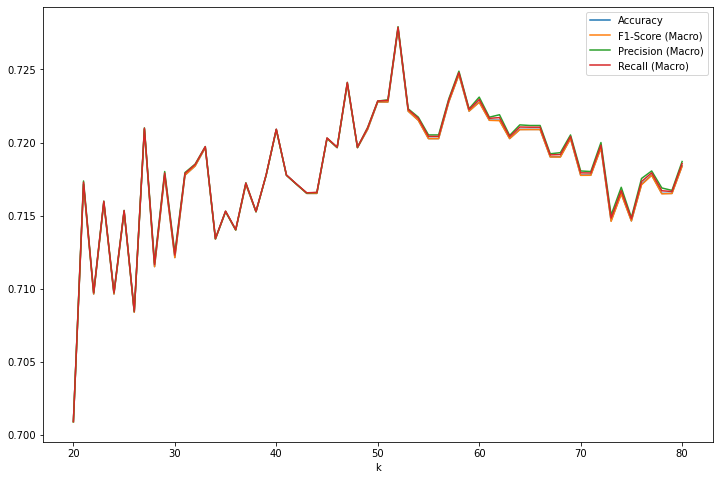

In [44]:
metrics_df.plot(figsize=(12, 8))

In [50]:
print(metrics_df.sort_values(by='F1-Score (Macro)', ascending=False).head())

      Accuracy  F1-Score (Macro)  Precision (Macro)  Recall (Macro)
k                                                                  
52.0  0.727785          0.727782           0.727927        0.727889
58.0  0.724656          0.724645           0.724883        0.724791
47.0  0.724030          0.724030           0.724115        0.724109
50.0  0.722778          0.722778           0.722839        0.722845
51.0  0.722778          0.722776           0.722919        0.722882


In [51]:
results_knn, mod_knn = model_performance(library=sklearn.neighbors,
                                         method=KNeighborsClassifier(n_neighbors=52, weights='distance'),
                                         X=stdata_tr, y=y_train)

results_knn

Resampling  Accuracy  Precision Macro  Recall Macro  F1 Macro
0     Training error  1.000000         1.000000      1.000000  1.000000
1  Single Validation  0.709139         0.710243      0.710004  0.709122
2        Monte Carlo  0.709139         0.685776      0.738858  0.711329
3             K-fold  0.713693         0.715784      0.707088  0.710710

#### 4.3.2 Support Vector Machines

In [52]:
resulsts_svm, mod_svm = model_performance(library=sklearn.svm,
                                          method=SVC(kernel='rbf', gamma= 'auto', C=1, verbose=1),
                                          X=stdata_tr, y=y_train)
resulsts_svm

[LibSVM][LibSVM]

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

Resampling  Accuracy  Precision Macro  Recall Macro  F1 Macro
0     Training error  0.740736         0.740871      0.740676  0.740664
1  Single Validation  0.723170         0.724024      0.723922  0.723167
2        Monte Carlo  0.723170         0.700805      0.749023  0.724112
3             K-fold  0.721445         0.725248      0.710218  0.717134

In [53]:
resulsts_svm, mod_svm = model_performance(library=sklearn.svm,
                                          method=LinearSVC(C=1,max_iter=1000, verbose=1,dual=False),
                                          X=stdata_tr, y=y_train)
resulsts_svm

[LibLinear][LibLinear]

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

Resampling  Accuracy  Precision Macro  Recall Macro  F1 Macro
0     Training error  0.727091         0.727086      0.727090  0.727087
1  Single Validation  0.733788         0.734341      0.734391  0.733787
2        Monte Carlo  0.733788         0.713230      0.754496  0.733283
3             K-fold  0.723576         0.722644      0.723363  0.722387

In [54]:
weights_svm = pd.DataFrame()
weights_svm['Features'] = stdata_tr.columns
weights_svm['Weights'] = mod_svm.coef_[0]
weights_svm = weights_svm.sort_values(by='Weights', ascending=False)
sorted_df = weights_svm.iloc[(-weights_svm['Weights'].abs()).argsort()[:10]]

top_features = sorted_df['Features'].tolist()
top_weights = sorted_df['Weights'].tolist()

print(sorted_df)

                  Features   Weights
10            blueGoldDiff  0.449085
17      redTowersDestroyed  0.185339
11      blueExperienceDiff  0.170350
4              blueDragons  0.127073
15              redDragons -0.120489
6      blueTowersDestroyed -0.118782
19   redTotalMinionsKilled  0.048676
16              redHeralds -0.036095
8   blueTotalMinionsKilled -0.035975
1           blueFirstBlood  0.033283


In [55]:
resulsts_svm, mod_svm = model_performance(library=sklearn.svm,
                                          method=LinearSVC(C=1,max_iter=1000, verbose=1, dual=True),
                                          X=stdata_tr, y=y_train)
resulsts_svm

[LibLinear][LibLinear]

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

Resampling  Accuracy  Precision Macro  Recall Macro  F1 Macro
0     Training error  0.727091         0.727086      0.727090  0.727087
1  Single Validation  0.733788         0.734341      0.734391  0.733787
2        Monte Carlo  0.733675         0.713072      0.754496  0.733199
3             K-fold  0.723701         0.722723      0.723607  0.722558

#### 4.3.7 Logistic Regression

In [56]:
results_lr, model_lr = model_performance(library=sklearn.linear_model, method=LogisticRegression(), X=stdata_tr, y=y_train)
results_lr

Resampling  Accuracy  Precision Macro  Recall Macro  F1 Macro
0     Training error  0.728217         0.728212      0.728212  0.728212
1  Single Validation  0.734547         0.735142      0.735173  0.734546
2        Monte Carlo  0.734547         0.713653      0.756059  0.734244
3             K-fold  0.724326         0.723748      0.723377  0.722945

In [57]:
weights_lr = pd.DataFrame()
weights_lr['Features'] = stdata_tr.columns
weights_lr['Weights'] = model_lr.coef_[0]
weights_lr = weights_lr.sort_values(by='Weights', ascending=False)
sorted_df = weights_lr.iloc[(-weights_lr['Weights'].abs()).argsort()[:10]]

top_features = sorted_df['Features'].tolist()
top_weights = sorted_df['Weights'].tolist()

print(sorted_df)

                  Features   Weights
10            blueGoldDiff  1.142864
17      redTowersDestroyed  0.431243
11      blueExperienceDiff  0.430720
4              blueDragons  0.320038
15              redDragons -0.303684
6      blueTowersDestroyed -0.261159
19   redTotalMinionsKilled  0.120765
14              redAssists  0.090298
8   blueTotalMinionsKilled -0.089518
16              redHeralds -0.086396


# 5. Model Evaluation

Como se observa, en general, tanto clasificadores generativos como clasificadores discriminativos obtienen resultados bastante similares para todas las métricas. El caso que destaca por tener resultados ligeramente peores que la media es *Quadratic Discriminant Analysis*, por lo que de ahora en adelante descartaremos este método de ajuste.

Por otro lado, los métodos que parecen dar resultados ligeramente mejores que la media son *Linear Discriminant Analysis*, *Ridge Classsifier*, *Logistic Regression* y *Support Vector Machines*, por lo que pondremos especial atención sobre estos métodos en futuros apartados. En estos casos se obtiene de media una *Accuracy* de alrededor del 73% (llegando en los mejores casos al 74%), una *Precision* de también 73%, un *Recall* o *True Positive Rate* nuevamente de 73% aproximadamente y, finalmente, un *F1 Score*, que combina las dos últimas métricas, también de alrededor de 73% (en los mejores casos estas métricas llegan al 75%). 

Estos resultados son bastante satisfactorios si tenemos en cuenta que hay bastantes factores de una partida de *League of Legends* que son muy difíciles de cuantificar de forma apropiada y que solo se toman datos de los 10 primeros minutos de partida (siendo que estas suelen durar entre 15 y 40 minutos). También, se refuerza la bondad de estos resultados porque las variables son muy fácilmente extraíbles de cualquier partida.

# 6 Re-Modelling (Discarded)

En el anterior planteamiento se ha hecho un tratamiento de outliers relativamente permisivo, por lo que en este nuevo planteamiento se hará una eliminación más exhaustiva y estricta de outliers. Con esta metodología es muy probable que el número de outliers detectados ascienda notablemente por lo que se eliminará gran parte del dataset, cosa que probablemente conlleve una mejora de las métricas previamente mencionadas para el ajuste de los modelos apropiados, pero probablemente también acarree una peor generalización de los modelos.

Concretamente, se revisarán los outliers de todas las mismas variables que en el tratamiento previo pero se será 5 veces más estricto con el criterio del IQR para las variables *blueWardsPlaced* y  *redWardsPlaced*.

In [58]:
outliers = 0
for col in X_train_outliers.columns:
    Q1 = X_train_outliers[col].quantile(0.25)
    Q3 = X_train_outliers[col].quantile(0.75)
    IQR = Q3 - Q1

    Q1, Q3, IQR
    if col != 'blueWardsPlaced' and col != 'redWardsPlaced':
        small_outliers = X_train_outliers[col] < (Q1 - 1.5 * IQR)
        big_outliers = X_train_outliers[col] > (Q3 + 1.5 * IQR) 
    else:
        small_outliers = X_train_outliers[col] < (Q1 - 15 * IQR)
        big_outliers = X_train_outliers[col] > (Q3 + 15 * IQR)
    
    outliers = outliers + sum(small_outliers) + sum(big_outliers)
    X_train_outliers = X_train_outliers[~(small_outliers | big_outliers)]
    y_train_outliers = y_train_outliers[~(small_outliers | big_outliers)]
print(f'Number of outliers removed: {outliers}')
print(X_train_outliers.shape)

Number of outliers removed: 4463
(3934, 21)


In [59]:
X_train_outliers.head()

blueWardsPlaced  blueFirstBlood  blueKills  blueAssists  blueDragons  \
7511               13               0         10            6            1   
6292               14               1         11           15            0   
4694               31               1          3            3            1   
5444               18               1         11            9            1   
4359               41               1          7            7            1   

      blueHeralds  blueTowersDestroyed  blueAvgLevel  blueTotalMinionsKilled  \
7511            0                    0           7.0                     192   
6292            0                    0           6.8                     170   
4694            0                    0           6.8                     213   
5444            0                    0           7.2                     212   
4359            0                    0           6.6                     190   

      blueTotalJungleMinionsKilled  blueGoldDiff  blueExperienceDiff  \
7511                            43          1794                2647   
6292                            40          3298                1038   
4694                            48         -2314               -2460   
5444                            60          3742                3229   
4359                            60           453               -1745   

      redWardsPlaced  redKills  redAssists  redDragons  redHeralds  \
7511              22         4           3           0           0   
6292              14         2           1           0           0   
4694              14         8          11           0           0   
5444              17         4           6           0           0   
4359              16         7           0           0           0   

      redTowersDestroyed  redAvgLevel  redTotalMinionsKilled  \
7511                   0          6.4                    203   
6292                   0          6.6                    210   
4694                   0          7.2                    237   
5444                   0          6.2                    184   
4359                   0          7.0                    238   

      redTotalJungleMinionsKilled  
7511                           40  
6292                           44  
4694                           61  
5444                           56  
4359                           51

Como se había previsto, el número de outliers tras revisar todas las variables ha aumentado de forma muy elevada a 2020, ascendiendo aproximadamente al 20% del *Train-split*. Esta decisión puede resultar poco adecuada porqué, a no ser que todos los outliers detectados con este criterio realmente sean casos realmente excepcionales, el modelo podría generalizar de manera muy pobre a pesar de obtener mejores resultados en las métricas de ajuste sobre el *Train-split*.

## 6.1 Standarization

Se estandarizan los datos de la misma forma que anteriormente:

In [60]:
categorical_columns = ['blueWins','blueFirstBlood', 'blueDragons', 'blueHeralds', 'redDragons' , 'redHeralds', 'blueTowersDestroyed', 'redTowersDestroyed']
columns_to_standarize = [col for col in X_train_outliers.columns.tolist() if col not in categorical_columns]

scaler = StandardScaler()

stdata_tr_out = X_train_outliers.copy()
stdata_tr_out[columns_to_standarize] = scaler.fit_transform(stdata_tr_out[columns_to_standarize])

In [61]:
stdata_tr_out.head()

blueWardsPlaced  blueFirstBlood  blueKills  blueAssists  blueDragons  \
7511        -0.587345               0   1.570228    -0.074179            1   
6292        -0.516874               1   1.951919     2.490659            0   
4694         0.681140               1  -1.101605    -0.929126            1   
5444        -0.234988               1   1.951919     0.780767            1   
4359         1.385854               1   0.425157     0.210803            1   

      blueHeralds  blueTowersDestroyed  blueAvgLevel  blueTotalMinionsKilled  \
7511            0                    0      0.422171               -1.346965   
6292            0                    0     -0.578926               -2.490977   
4694            0                    0     -0.578926               -0.254953   
5444            0                    0      1.423267               -0.306954   
4359            0                    0     -1.580023               -1.450966   

      blueTotalJungleMinionsKilled  blueGoldDiff  blueExperienceDiff  \
7511                     -0.812255      0.989832            1.872243   
6292                     -1.145654      1.803972            0.767024   
4694                     -0.256589     -1.233896           -1.635745   
5444                      1.077008      2.044317            2.272018   
4359                      1.077008      0.263926           -1.144613   

      redWardsPlaced  redKills  redAssists  redDragons  redHeralds  \
7511        0.089683 -0.740345   -0.952099           0           0   
6292       -0.546305 -1.505087   -1.518106           0           0   
4694       -0.546305  0.789138    1.311932           0           0   
5444       -0.307810 -0.740345   -0.103087           0           0   
4359       -0.387308  0.406767   -1.801110           0           0   

      redTowersDestroyed  redAvgLevel  redTotalMinionsKilled  \
7511                   0    -1.994612              -0.786045   
6292                   0    -1.248434              -0.441131   
4694                   0     0.990098               0.889252   
5444                   0    -2.740790              -1.722241   
4359                   0     0.243921               0.938525   

      redTotalJungleMinionsKilled  
7511                    -1.181058  
6292                    -0.754422  
4694                     1.058782  
5444                     0.525487  
4359                    -0.007808

## 6.2 Modelling

#### 6.2.1 Linear Discriminant Analysis

In [62]:
results_lda, mod_lda = model_performance(library=sklearn.discriminant_analysis,
                                         method=LinearDiscriminantAnalysis(),
                                         X=stdata_tr_out, y=y_train_outliers)
results_lda

Resampling  Accuracy  Precision Macro  Recall Macro  F1 Macro
0     Training error  0.705897         0.705897      0.705898  0.705897
1  Single Validation  0.689761         0.689330      0.689104  0.689184
2        Monte Carlo  0.689761         0.680713      0.670927  0.675784
3             K-fold  0.702866         0.702575      0.700534  0.700517

In [63]:
weights_lda = pd.DataFrame()
weights_lda['Features'] = stdata_tr_out.columns
weights_lda['Weights'] = mod_lda.coef_[0]
weights_lda = weights_lda.sort_values(by='Weights', ascending=False)

fig = px.bar(weights_lda, x="Features", y="Weights", color="Features",
             color_discrete_sequence=colors)

fig.update_xaxes(showticklabels=False)

fig.update_xaxes(title_text="Features weighted by LDA")

fig.show()

In [64]:
sorted_df = weights_lda.iloc[(-weights_lda['Weights'].abs()).argsort()[:10]]

top_features = sorted_df['Features'].tolist()
top_weights = sorted_df['Weights'].tolist()

print(sorted_df)

                       Features   Weights
10                 blueGoldDiff  1.105796
11           blueExperienceDiff  0.345628
15                   redDragons -0.311463
4                   blueDragons  0.268637
19        redTotalMinionsKilled  0.180363
2                     blueKills -0.137517
8        blueTotalMinionsKilled -0.109231
13                     redKills  0.098710
14                   redAssists  0.075530
20  redTotalJungleMinionsKilled  0.069519


In [65]:
X_transformed = mod_lda.transform(stdata_tr)

X_transformed = pd.DataFrame(X_transformed)
X_transformed['labels'] = y_train.reset_index(drop=True)
X_transformed['labels'] = X_transformed['labels'].astype('category')

X_transformed

0 labels
0     1.228901      1
1    -0.226105      1
2     2.526676      1
3     1.421761      1
4    -0.724767      0
...        ...    ...
7983 -0.881419      0
7984 -1.569433      0
7985 -1.319347      1
7986 -0.268825      0
7987  1.648219      1

[7988 rows x 2 columns]

In [66]:
import numpy as np
fig = px.scatter(X_transformed, x=0, color='labels',
                color_discrete_sequence=['#21918c', "#fde725"],
                labels={'0': 'First component', '1': 'Second component'},
                title='LDA projection of the data'
                )
fig.show()

#### 6.2.2 Logistic Regression

In [67]:
results_lr, model_lr = model_performance(library=sklearn.linear_model, method=LogisticRegression(), X=stdata_tr_out, y=y_train_outliers)
results_lr

Resampling  Accuracy  Precision Macro  Recall Macro  F1 Macro
0     Training error  0.704881         0.704880      0.704879  0.704880
1  Single Validation  0.689761         0.689332      0.689215  0.689263
2        Monte Carlo  0.689761         0.679549      0.674121  0.676824
3             K-fold  0.703375         0.703575      0.700077  0.700799

In [68]:
weights_lr = pd.DataFrame()
weights_lr['Features'] = stdata_tr.columns
weights_lr['Weights'] = model_lr.coef_[0]
weights_lr = weights_lr.sort_values(by='Weights', ascending=False)
sorted_df = weights_lr.iloc[(-weights_lr['Weights'].abs()).argsort()[:10]]

top_features = sorted_df['Features'].tolist()
top_weights = sorted_df['Weights'].tolist()

print(sorted_df)

                       Features   Weights
10                 blueGoldDiff  1.102069
11           blueExperienceDiff  0.329888
15                   redDragons -0.298480
4                   blueDragons  0.256093
19        redTotalMinionsKilled  0.178555
2                     blueKills -0.128014
8        blueTotalMinionsKilled -0.108681
14                   redAssists  0.085362
13                     redKills  0.084997
20  redTotalJungleMinionsKilled  0.069873


#### 6.2.3 Support Vector Machines (Primal)

In [69]:
resulsts_svm, mod_svm = model_performance(library=sklearn.svm,
                                          method=LinearSVC(C=1,max_iter=1000, verbose=1,dual=False),
                                          X=stdata_tr_out, y=y_train_outliers)
resulsts_svm

[LibLinear][LibLinear]

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

Resampling  Accuracy  Precision Macro  Recall Macro  F1 Macro
0     Training error  0.705643         0.705643      0.705643  0.705643
1  Single Validation  0.688992         0.688560      0.688305  0.688392
2        Monte Carlo  0.688992         0.680195      0.669329  0.674718
3             K-fold  0.702104         0.701848      0.699556  0.699725

#  7. Optimization of Hyperparameters

#### 7.1 Linear Discriminant Analysis

In [70]:
model = LinearDiscriminantAnalysis()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']

search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

results = search.fit(stdata_tr, y_train)

print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.724
Config: {'solver': 'svd'}


In [71]:
model = LinearDiscriminantAnalysis(solver='eigen')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid['shrinkage'] = arange(0, 1, 0.01)

search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

results = search.fit(stdata_tr, y_train)

print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.726
Config: {'shrinkage': 0.03}


In [72]:
results_lda, mod_lda = model_performance(library=sklearn.discriminant_analysis,
                                         method=LinearDiscriminantAnalysis(solver='eigen', shrinkage=0.03),
                                         X=stdata_tr, y=y_train)
results_lda

Resampling  Accuracy  Precision Macro  Recall Macro  F1 Macro
0     Training error  0.728217         0.728212      0.728211  0.728211
1  Single Validation  0.732272         0.732704      0.732804  0.732267
2        Monte Carlo  0.732272         0.712695      0.750586  0.731150
3             K-fold  0.725076         0.725162      0.722692  0.723343

In [73]:
weights_lda = pd.DataFrame()
weights_lda['Features'] = stdata_tr.columns
weights_lda['Weights'] = mod_lda.coef_[0]
weights_lda = weights_lda.sort_values(by='Weights', ascending=False)
sorted_df = weights_lda.iloc[(-weights_lda['Weights'].abs()).argsort()[:10]]

top_features = sorted_df['Features'].tolist()
top_weights = sorted_df['Weights'].tolist()

print(sorted_df)

                        Features   Weights
10                  blueGoldDiff  0.823530
11            blueExperienceDiff  0.432633
4                    blueDragons  0.314119
15                    redDragons -0.294991
17            redTowersDestroyed  0.196772
1                 blueFirstBlood  0.114136
13                      redKills -0.099812
6            blueTowersDestroyed -0.092600
2                      blueKills  0.090739
9   blueTotalJungleMinionsKilled  0.087629


### 7.2 Logistic Regression

Para empezar, compararemos los distintos solvers de los que dispone la función sklearn.linear_model.LogisticRegression() para determinar cuál de estos solvers ofrece un mejor rendimiento. El que utiliza la función por defecto es *lbfgs*. Lo evaluaremos mediante Single-Validation con un *learn* y *validation* split del dataset ya procesado. Esta decisión se debe a que hacer todo el proceso de resampling podría resultar muy costoso.

In [74]:
X_learn, X_val, y_learn, y_val = train_test_split(stdata_tr, y_train, test_size=0.15, random_state=77)

In [75]:
X_learn.shape, X_val.shape, y_learn.shape, y_val.shape

((6789, 21), (1199, 21), (6789,), (1199,))

In [76]:
solver = [ 
LogisticRegression(solver='newton-cg',penalty='none',max_iter=1000), 
LogisticRegression(solver='lbfgs',penalty='none',max_iter=1000), 
LogisticRegression(solver='sag',penalty='none',max_iter=1000), 
LogisticRegression(solver='saga',penalty='none',max_iter=1000),
LogisticRegression(solver='liblinear',penalty='l1',max_iter=1000),
LogisticRegression(solver='liblinear',penalty='l2',max_iter=1000),
] 
solver_columns = [] 
solver_compare = pd.DataFrame(columns = solver_columns) 
row_index = 0 
names = ['newton-cg','lbfgs','sag','saga','liblinear(l1)','liblinear(l2)']
for alg in solver: 
       y_pred = alg.fit(X_learn, y_learn).predict(X_val) 
       solver_name = alg.__class__.__name__ 
       solver_compare.loc[names[row_index], 'Accuracy'] = round( accuracy_score(y_val,y_pred), 5) 
       solver_compare.loc[names[row_index], 'Precission Macro'] = round(precision_score(y_val,y_pred,  average='macro'), 5) 
       solver_compare.loc[names[row_index], 'Recall Macro'] = round(recall_score(y_val,y_pred,  average='macro'),5)  
       solver_compare.loc[names[row_index], 'AUC'] = round(f1_score(y_val,y_pred, average='macro'),5) 
       row_index+=1 
solver_compare.sort_values(by = ['Accuracy'], ascending = False, inplace = True) 
solver_compare

Accuracy  Precission Macro  Recall Macro      AUC
newton-cg       0.72977           0.72972       0.72974  0.72973
lbfgs           0.72977           0.72972       0.72974  0.72973
sag             0.72977           0.72972       0.72974  0.72973
saga            0.72977           0.72972       0.72974  0.72973
liblinear(l2)   0.72977           0.72972       0.72974  0.72973
liblinear(l1)   0.72894           0.72890       0.72892  0.72890

Observamos que la variación de resulatdos entre distintos solvers es insignficante, por lo que ahora pasamos a ver si la penalización marca alguna diferencia:

In [77]:
solver = [ 
LogisticRegression(solver='newton-cg',penalty='none',max_iter=1000),
LogisticRegression(solver='newton-cg',penalty='l2',max_iter=1000), 
LogisticRegression(solver='lbfgs',penalty='none',max_iter=1000),
LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000),
LogisticRegression(solver='sag',penalty='none',max_iter=1000),
LogisticRegression(solver='sag',penalty='l2',max_iter=1000),  
LogisticRegression(solver='saga',penalty='none',max_iter=1000),
LogisticRegression(solver='saga',penalty='l1',max_iter=1000, l1_ratio=0.5),
LogisticRegression(solver='saga',penalty='l2',max_iter=1000),
LogisticRegression(solver='saga',penalty='elasticnet',max_iter=1000, l1_ratio=0.5),
LogisticRegression(solver='liblinear',penalty='l1',max_iter=1000),
LogisticRegression(solver='liblinear',penalty='l2',max_iter=1000),
] 
solver_columns = [] 
solver_compare = pd.DataFrame(columns = solver_columns) 
row_index = 0 
names = ['newton-cg', 'newton-cg(l2)','lbfgs', 'lbfgs(l2)', 'sag', 'sag(l2)','saga','saga(l1)', 'saga(l2)', 'saga(elasticnet)','liblinear(l1)','liblinear(l2)']
for alg in solver: 
       y_pred = alg.fit(X_learn, y_learn).predict(X_val) 
       solver_name = alg.__class__.__name__ 
       solver_compare.loc[names[row_index], 'Accuracy'] = round( accuracy_score(y_val,y_pred), 5) 
       solver_compare.loc[names[row_index], 'Precission Macro'] = round(precision_score(y_val,y_pred,  average='macro'), 5) 
       solver_compare.loc[names[row_index], 'Recall Macro'] = round(recall_score(y_val,y_pred,  average='macro'),5)  
       solver_compare.loc[names[row_index], 'AUC'] = round(f1_score(y_val,y_pred, average='macro'),5) 
       row_index+=1 
solver_compare.sort_values(by = ['Accuracy'], ascending = False, inplace = True) 
solver_compare

Accuracy  Precission Macro  Recall Macro      AUC
newton-cg          0.72977           0.72972       0.72974  0.72973
newton-cg(l2)      0.72977           0.72972       0.72974  0.72973
lbfgs              0.72977           0.72972       0.72974  0.72973
lbfgs(l2)          0.72977           0.72972       0.72974  0.72973
sag                0.72977           0.72972       0.72974  0.72973
sag(l2)            0.72977           0.72972       0.72974  0.72973
saga               0.72977           0.72972       0.72974  0.72973
saga(l1)           0.72977           0.72972       0.72974  0.72973
saga(l2)           0.72977           0.72972       0.72974  0.72973
saga(elasticnet)   0.72977           0.72972       0.72974  0.72973
liblinear(l2)      0.72977           0.72972       0.72974  0.72973
liblinear(l1)      0.72894           0.72890       0.72892  0.72890

Vemos que una vez más, ajustar los parámetros causa diferencias casi imperceptibles en el ajuste, por lo que en este caso, se tomará el modelo por defecto con solver por defecto y sin regularización.

### 7.3 SVM (Primal)

In [78]:
best_met = 0
C = 0.01
mean = 0
best = C
while(C <= 10):
    mod = LinearSVC(C=C,max_iter=1000, verbose=1,dual=False)
    mod.fit(X_learn, y_learn)
    y_pred = mod.predict(X_val) 
    mean = (accuracy_score(y_val,y_pred) + precision_score(y_val,y_pred,  average='macro') + recall_score(y_val,y_pred,  average='macro') + f1_score(y_val,y_pred, average='macro'))/4
    if mean > best_met:
        best_met = mean
        best = C
    C = C + 0.01

print()
print(f'Best C: {best} with a mean of {best_met}')

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

El mejor valor para el hiperparáemtro C parace ser 0.02, así que ajustemos ese modelo y analizemos los resultados:

In [79]:
resulsts_svm, mod_svm = model_performance(library=sklearn.svm,
                                          method=LinearSVC(C=0.02,max_iter=1000, verbose=1,dual=False),
                                          X=stdata_tr, y=y_train)
resulsts_svm

[LibLinear][LibLinear]

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

Resampling  Accuracy  Precision Macro  Recall Macro  F1 Macro
0     Training error  0.727091         0.727086      0.727088  0.727087
1  Single Validation  0.735305         0.735859      0.735909  0.735304
2        Monte Carlo  0.735305         0.714708      0.756059  0.734802
3             K-fold  0.724952         0.724184      0.724481  0.723719

In [80]:
weights_svm = pd.DataFrame()
weights_svm['Features'] = stdata_tr.columns
weights_svm['Weights'] = mod_svm.coef_[0]
weights_svm = weights_svm.sort_values(by='Weights', ascending=False)
sorted_df = weights_svm.iloc[(-weights_svm['Weights'].abs()).argsort()[:10]]

top_features = sorted_df['Features'].tolist()
top_weights = sorted_df['Weights'].tolist()

print(sorted_df)

                  Features   Weights
10            blueGoldDiff  0.411506
11      blueExperienceDiff  0.169288
17      redTowersDestroyed  0.151888
4              blueDragons  0.124620
15              redDragons -0.118106
6      blueTowersDestroyed -0.091255
19   redTotalMinionsKilled  0.041691
1           blueFirstBlood  0.035476
16              redHeralds -0.034828
8   blueTotalMinionsKilled -0.028841


# 8. Test Validation

In [81]:
indexes = ['Accuracy', 'Precision Macro', 'Recall Macro', 'F1-Score']   

### 8.3 SVM Primal

In [86]:
resulsts_svm, mod_svm = model_performance(library=sklearn.svm,
                                          method=LinearSVC(C=0.02,max_iter=1000, verbose=1,dual=False),
                                          X=stdata_tr, y=y_train)
resulsts_svm

[LibLinear][LibLinear]

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

Resampling  Accuracy  Precision Macro  Recall Macro  F1 Macro
0     Training error  0.727091         0.727086      0.727088  0.727087
1  Single Validation  0.735305         0.735859      0.735909  0.735304
2        Monte Carlo  0.735305         0.714708      0.756059  0.734802
3             K-fold  0.724952         0.724184      0.724481  0.723719

In [87]:
results = compute_metrics(y_test, mod_svm.predict(stdata_te))
pd.DataFrame(results, index=indexes, columns=['SVM Primal'])

SVM Primal
Accuracy           0.738192
Precision Macro    0.738294
Recall Macro       0.738253
F1-Score           0.738187

### 8.5 Importancia de las variables

In [88]:
weights_lda = pd.DataFrame()
weights_lda['Features'] = stdata_tr.columns
weights_lda['Weights'] = mod_lda.coef_[0]
weights_lda = weights_lda.sort_values(by='Weights', ascending=False)

scaler = MinMaxScaler()
weights_lda['Weights'] = scaler.fit_transform(weights_lda[['Weights']])
sorted_df = weights_lda.iloc[(-weights_lda['Weights'].abs()).argsort()[:10]]

fig = px.bar(sorted_df, x="Features", y="Weights", color="Features",
                color_discrete_sequence=colors)

fig.update_xaxes(showticklabels=False)

In [89]:
weights_lr = pd.DataFrame()
weights_lr['Features'] = stdata_tr.columns
weights_lr['Weights'] = model_lr.coef_[0]
weights_lr = weights_lr.sort_values(by='Weights', ascending=False)

scaler = MinMaxScaler()
weights_lr['Weights'] = scaler.fit_transform(weights_lr[['Weights']])
sorted_df = weights_lr.iloc[(-weights_lr['Weights'].abs()).argsort()[:10]]

fig = px.bar(sorted_df, x="Features", y="Weights", color="Features",
                color_discrete_sequence=colors)

fig.update_xaxes(showticklabels=False)

In [90]:
weights_svm = pd.DataFrame()
weights_svm['Features'] = stdata_tr.columns
weights_svm['Weights'] = mod_svm.coef_[0]
weights_svm = weights_svm.sort_values(by='Weights', ascending=False)

scaler = MinMaxScaler()
weights_svm['Weights'] = scaler.fit_transform(weights_svm[['Weights']])
sorted_df = weights_svm.iloc[(-weights_svm['Weights'].abs()).argsort()[:10]]

fig = px.bar(sorted_df, x="Features", y="Weights", color="Features",
                color_discrete_sequence=colors)

fig.update_xaxes(showticklabels=False)